## Examples of trading algorithms using Jupyter Notebook

For the example below, $\color{red}{\text{ingest the data by running the following command}}$:



In [ ]:
! catalyst ingest-exchange -x bitfinex -i btc_usd

After that run the following comand to register the Catalyst magic:

In [3]:
%load_ext catalyst

In [4]:
# Setup matplotlib to display graphs inline in this Notebook
%matplotlib inline

#### Buy and Hold BTC Algorithm

A very straightforward buy and hold that makes one single buy at the very beginning. Introduces the notions of **cash**, management of outstanding **orders**, and **order_target_value** to place orders. It also introduces the **analyze()** function to visualize the performance of our strategy using the external library **matplotlib**.

In [5]:
# some useful packages
import pandas as pd
import pickle

Running in backtesting mode.


[2019-01-18 19:31:30.953512] INFO: run_algo: Catalyst version 0+unknown
[2019-01-18 19:31:30.954701] WARNING: run_algo: Catalyst is currently in ALPHA. It is going through rapid development and it is subject to errors. Please use carefully. We encourage you to report any issue on GitHub: https://github.com/enigmampc/catalyst/issues
[2019-01-18 19:31:33.961507] INFO: run_algo: running algo in backtest mode
[2019-01-18 19:31:33.969598] INFO: exchange_algorithm: initialized trading algorithm in backtest mode
[2019-01-18 19:31:38.082680] INFO: Performance: Simulated 851 trading days out of 851.
[2019-01-18 19:31:38.086329] INFO: Performance: first open: 2015-03-01 00:00:00+00:00
[2019-01-18 19:31:38.089027] INFO: Performance: last close: 2017-06-28 23:59:00+00:00


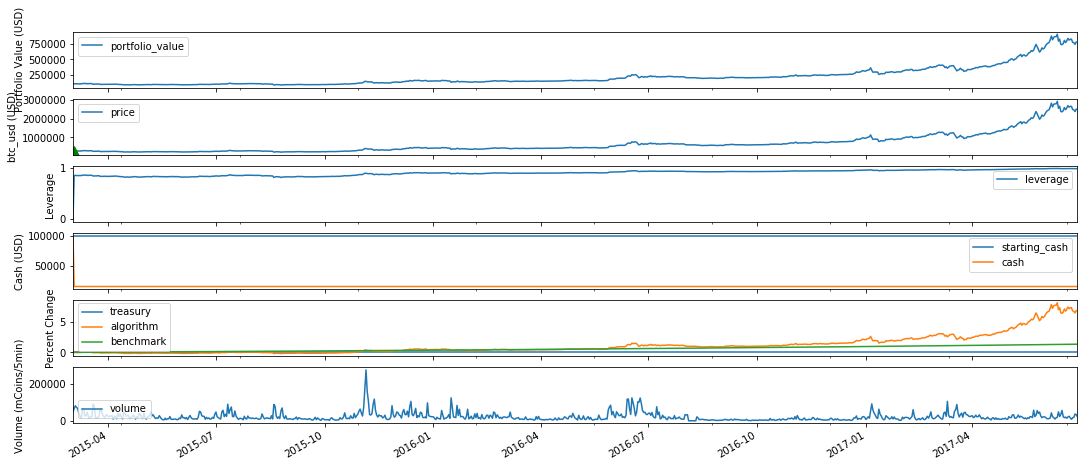

algo_volatility  algorithm_period_return alpha  \
2015-03-01 23:59:00+00:00              NaN                 0.000000  None   
2015-03-02 23:59:00+00:00         0.019939                -0.001776  None   
2015-03-03 23:59:00+00:00         0.186145                 0.017553  None   
2015-03-04 23:59:00+00:00         0.331260                -0.014215  None   
2015-03-05 23:59:00+00:00         0.310937                -0.000923  None   
2015-03-06 23:59:00+00:00         0.290939                -0.014124  None   
2015-03-07 23:59:00+00:00         0.277477                -0.003118  None   
2015-03-08 23:59:00+00:00         0.257827                -0.007325  None   
2015-03-09 23:59:00+00:00         0.350756                 0.039657  None   
2015-03-10 23:59:00+00:00         0.330697                 0.044596  None   
2015-03-11 23:59:00+00:00         0.315536                 0.056730  None   
2015-03-12 23:59:00+00:00         0.303210                 0.053529  None   
2015-03-13 23:59:00+00:00         0.340273                 0.015815  None   
2015-03-14 23:59:00+00:00         0.327198                 0.014047  None   
2015-03-15 23:59:00+00:00         0.318943                 0.027157  None   
2015-03-16 23:59:00+00:00         0.311121                 0.040327  None   
2015-03-17 23:59:00+00:00         0.311070                 0.022126  None   
2015-03-18 23:59:00+00:00         0.438719                -0.063362  None   
2015-03-19 23:59:00+00:00         0.431813                -0.048819  None   
2015-03-20 23:59:00+00:00         0.420426                -0.048179  None   
2015-03-21 23:59:00+00:00         0.409948                -0.053423  None   
2015-03-22 23:59:00+00:00         0.412077                -0.027965  None   
2015-03-23 23:59:00+00:00         0.402823                -0.032813  None   
2015-03-24 23:59:00+00:00         0.447946                -0.097538  None   
2015-03-25 23:59:00+00:00         0.438785                -0.096654  None   
2015-03-26 23:59:00+00:00         0.432105                -0.087386  None   
2015-03-27 23:59:00+00:00         0.424152                -0.096014  None   
2015-03-28 23:59:00+00:00         0.422997                -0.076349  None   
2015-03-29 23:59:00+00:00         0.425448                -0.107477  None   
2015-03-30 23:59:00+00:00         0.422576                -0.091654  None   
...                                    ...                      ...   ...   
2017-05-30 23:59:00+00:00         0.427093                 5.697279  None   
2017-05-31 23:59:00+00:00         0.426948                 5.834779  None   
2017-06-01 23:59:00+00:00         0.427616                 6.201242  None   
2017-06-02 23:59:00+00:00         0.427845                 6.487523  None   
2017-06-03 23:59:00+00:00         0.427723                 6.655510  None   
2017-06-04 23:59:00+00:00         0.427487                 6.738437  None   
2017-06-05 23:59:00+00:00         0.428334                 7.191791  None   
2017-06-06 23:59:00+00:00         0.430036                 7.825023  None   
2017-06-07 23:59:00+00:00         0.431619                 7.213437  None   
2017-06-08 23:59:00+00:00         0.432172                 7.632644  None   
2017-06-09 23:59:00+00:00         0.431928                 7.716486  None   
2017-06-10 23:59:00+00:00         0.431674                 7.707340  None   
2017-06-11 23:59:00+00:00         0.432110                 8.121364  None   
2017-06-12 23:59:00+00:00         0.437488                 6.986608  None   
2017-06-13 23:59:00+00:00         0.437728                 7.314352  None   
2017-06-14 23:59:00+00:00         0.441361                 6.452157  None   
2017-06-15 23:59:00+00:00         0.441129                 6.400937  None   
2017-06-16 23:59:00+00:00         0.441029                 6.583864  None   
2017-06-17 23:59:00+00:00         0.442272                 7.110083  None   
2017-06-18 23:59:00+00:00         0.442774                 6.748193  None   
2017-06-19 23:59:00+00:

In [13]:
%%catalyst --start 2015-3-1 --end 2017-6-28 --capital-base 100000 -x bitfinex -c usd

from catalyst.finance.slippage import VolumeShareSlippage

from catalyst.api import (
    order_target_value,
    symbol,
    record,
    cancel_order,
    get_open_orders,
)

def initialize(context):
    context.ASSET_NAME = 'btc_usd'
    context.TARGET_HODL_RATIO = 0.8
    context.RESERVE_RATIO = 1.0 - context.TARGET_HODL_RATIO

    # For all trading pairs in the poloniex bundle, the default denomination
    # currently supported by Catalyst is 1/1000th of a full coin. Use this
    # constant to scale the price of up to that of a full coin if desired.
    context.TICK_SIZE = 1000.0

    context.is_buying = True
    context.asset = symbol(context.ASSET_NAME)

    context.i = 0

def handle_data(context, data):
    context.i += 1

    starting_cash = context.portfolio.starting_cash
    target_hodl_value = context.TARGET_HODL_RATIO * starting_cash
    reserve_value = context.RESERVE_RATIO * starting_cash

    # Cancel any outstanding orders
    orders = get_open_orders(context.asset) or []
    for order in orders:
        cancel_order(order)
    
    # Stop buying after passing the reserve threshold
    cash = context.portfolio.cash
    if cash <= reserve_value:
        context.is_buying = False

    # Retrieve current asset price from pricing data
    price = data.current(context.asset,'price')

    # Check if still buying and could (approximately) afford another purchase
    if context.is_buying and cash > price:
        # Place order to make position in asset equal to target_hodl_value
        order_target_value(
            context.asset,
            target_hodl_value,
            limit_price=price*1.1,
        )

    record(
        price=price,
        volume=data.current(context.asset,'volume'),
        cash=cash,
        starting_cash=context.portfolio.starting_cash,
        leverage=context.account.leverage,
    )

def analyze(context=None, results=None):
    import matplotlib.pyplot as plt

    # Plot the portfolio and asset data.
    ax1 = plt.subplot(611)
    results[['portfolio_value']].plot(ax=ax1)
    ax1.set_ylabel('Portfolio Value (USD)')

    ax2 = plt.subplot(612, sharex=ax1)
    ax2.set_ylabel('{asset} (USD)'.format(asset=context.ASSET_NAME))
    (context.TICK_SIZE * results[['price']]).plot(ax=ax2)

    trans = results.ix[[t != [] for t in results.transactions]]
    buys = trans.ix[
        [t[0]['amount'] > 0 for t in trans.transactions]
    ]
    ax2.plot(
        buys.index,
        context.TICK_SIZE * results.price[buys.index],
        '^',
        markersize=10,
        color='g',
    )

    ax3 = plt.subplot(613, sharex=ax1)
    results[['leverage', 'alpha', 'beta']].plot(ax=ax3)
    ax3.set_ylabel('Leverage ')

    ax4 = plt.subplot(614, sharex=ax1)
    results[['starting_cash', 'cash']].plot(ax=ax4)
    ax4.set_ylabel('Cash (USD)')

    results[[
        'treasury',
        'algorithm',
        'benchmark',
    ]] = results[[
        'treasury_period_return',
        'algorithm_period_return',
        'benchmark_period_return',
    ]]

    ax5 = plt.subplot(615, sharex=ax1)
    results[[
        'treasury',
        'algorithm',
        'benchmark',
    ]].plot(ax=ax5)
    ax5.set_ylabel('Percent Change')

    ax6 = plt.subplot(616, sharex=ax1)
    results[['volume']].plot(ax=ax6)
    ax6.set_ylabel('Volume (mCoins/5min)')

    plt.legend(loc=3)

    # Show the plot.
    plt.gcf().set_size_inches(18, 8)
    plt.show()

In [14]:
# Store this data set in the variable buy_and_hold_data
buy_and_hold_data = _

In [15]:
buy_and_hold_data.head()

algo_volatility  algorithm_period_return alpha  \
2015-03-01 23:59:00+00:00              NaN                 0.000000  None   
2015-03-02 23:59:00+00:00         0.019939                -0.001776  None   
2015-03-03 23:59:00+00:00         0.186145                 0.017553  None   
2015-03-04 23:59:00+00:00         0.331260                -0.014215  None   
2015-03-05 23:59:00+00:00         0.310937                -0.000923  None   

                           benchmark_period_return  benchmark_volatility  \
2015-03-01 23:59:00+00:00                 0.001000                   NaN   
2015-03-02 23:59:00+00:00                 0.002001                   0.0   
2015-03-03 23:59:00+00:00                 0.003003                   0.0   
2015-03-04 23:59:00+00:00                 0.004006                   0.0   
2015-03-05 23:59:00+00:00                 0.005010                   0.0   

                           beta  capital_used           cash    ending_cash  \
2015-03-01 23:59:00+00:00  None      0.000000  100000.000000  100000.000000   
2015-03-02 23:59:00+00:00  None -84753.846492   15246.153508   15246.153508   
2015-03-03 23:59:00+00:00  None      0.000000   15246.153508   15246.153508   
2015-03-04 23:59:00+00:00  None      0.000000   15246.153508   15246.153508   
2015-03-05 23:59:00+00:00  None      0.000000   15246.153508   15246.153508   

                           ending_exposure    ...      starting_cash  \
2015-03-01 23:59:00+00:00         0.000000    ...           100000.0   
2015-03-02 23:59:00+00:00     84576.219515    ...           100000.0   
2015-03-03 23:59:00+00:00     86509.146345    ...           100000.0   
2015-03-04 23:59:00+00:00     83332.317076    ...           100000.0   
2015-03-05 23:59:00+00:00     84661.585369    ...           100000.0   

                           starting_exposure  starting_value  trading_days  \
2015-03-01 23:59:00+00:00           0.000000        0.000000             1   
2015-03-02 23:59:00+00:00           0.000000        0.000000             2   
2015-03-03 23:59:00+00:00       84576.219515    84576.219515             3   
2015-03-04 23:59:00+00:00       86509.146345    86509.146345             4   
2015-03-05 23:59:00+00:00       83332.317076    83332.317076             5   

                                                                transactions  \
2015-03-01 23:59:00+00:00                                                 []   
2015-03-02 23:59:00+00:00  [{'amount': 304.8780487921066, 'dt': 2015-03-0...   
2015-03-03 23:59:00+00:00                                                 []   
2015-03-04 23:59:00+00:00                                                 []   
2015-03-05 23:59:00+00:00                                                 []   

                           treasury_period_return        volume  treasury  \
2015-03-01 23:59:00+00:00                   0.001  47597.424668     0.001   
2015-03-02 23:59:00+00:00                   0.001  67168.440498     0.001   
2015-03-03 23:59:00+00:00                   0.001  81226.398297     0.001   
2015-03-04 23:59:00+00:00                   0.001  71521.587766     0.001   
2015-03-05 23:59:00+00:00                   0.001  66108.884634     0.001   

                           algorithm  benchmark  
2015-03-01 23:59:00+00:00   0.000000   0.001000  
2015-03-02 23:59:00+00:00  -0.001776   0.002001  
2015-03-03 23:59:00+00:00   0.017553   0.003003  
2015-03-04 23:59:00+00:00  -0.014215   0.004006  
2015-03-05 23:59:00+00:00  -0.000923   0.005010  

[5 rows x 45 columns]

You can save this dataset and explore it by dragging it directly to the working space

In [16]:
buy_and_hold_data.to_csv('BuyAndHoldBacktest.csv')